In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1.Import Libraies**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")

# **2.Read Csv File**

In [3]:
df=pd.read_csv("/content/drive/MyDrive/WHO-COVID-19-global-data.csv")

# **3.How Is Data Big ?**

In [4]:
df.shape
#dataset having 117741 Row and 8 Columns

(232023, 8)

# **4.How Data Looks Like ?**

In [5]:
values=[df['Date_reported'].head(20),df['Country_code'].head(20),df['Country'].head(20),
        df['WHO_region'].head(20),df['New_cases'].head(20),df['Cumulative_cases'].head(20),
        df['New_deaths'].head(20),df['Cumulative_deaths'].head(20)]
fig = go.Figure(data=[go.Table(
    header=dict(values=list(df.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=values,
               fill_color='lavender',
               align='left'))
])
fig.show()

# **5.Looking Data Type**

In [6]:
Data_Type=['object','object','object','object','int64','int64','int64','int64']
columns=df.columns
info=pd.DataFrame({'Columns':columns,'Data_Type':Data_Type})
fig = go.Figure(data=[go.Table(
    header=dict(values=list(info.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[info['Columns'],info['Data_Type']],
    fill_color ='#D0F9B1',
    align='left'))
])
fig.show()


# **6.Having Duplicates Values ?**

In [7]:
print("Duplicated Values =", df.duplicated().sum())

Duplicated Values = 0


# **7.Having Missing Values**

In [8]:
MV=pd.DataFrame({"Columns":df.columns,
    "Missing_Values":list(df.isnull().sum())})
fig = go.Figure(data=[go.Table(
    header=dict(values=list(MV.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[MV['Columns'],MV['Missing_Values']],
    fill_color ='#FEBFB3',
    align='left'))
])
fig.show()


In [9]:
#drop  Country Code
df.drop(columns=['Country_code'],axis=1,inplace=True)

# **8.Describe The Data**

In [10]:
describe=df.describe(include='all')
describe.insert(0, "Statistics",describe.index, True)
values=[describe['Statistics'],describe['Date_reported'],describe['Country'],
        describe['WHO_region'],describe['New_cases'],describe['Cumulative_cases'],
        describe['New_deaths'],describe['Cumulative_deaths']]
fig = go.Figure(data=[go.Table(
    header=dict(values=list(describe.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=values,
               fill_color='lavender',
               align='left'))
])
fig.show()

# **9.EDA**

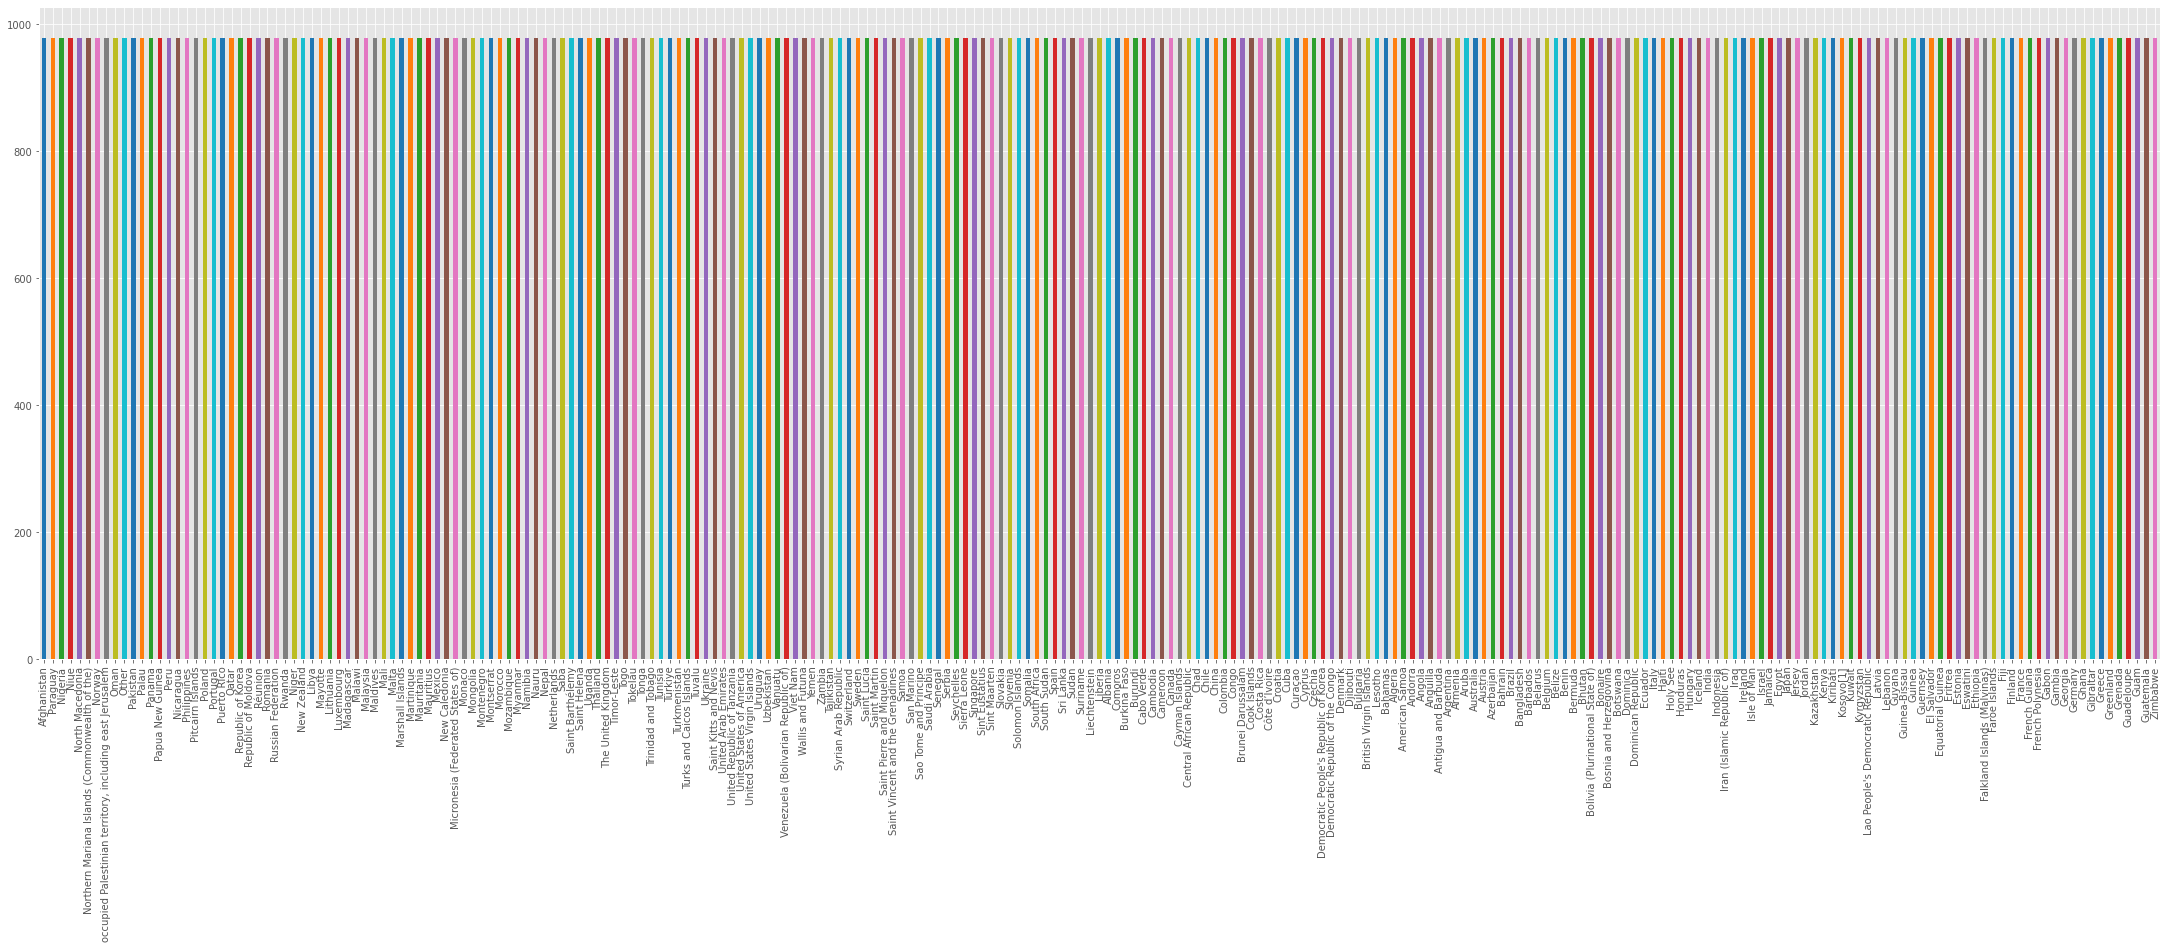

In [14]:
plt.figure(figsize=(38,12))
df['Country'].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
#All Country Are Equaly Distributed


**WHO Member States are grouped into six WHO regions -- Regional Office for Africa (AFRO), Regional Office for the Americas (AMRO), Regional Office for South-East Asia (SEARO), Regional Office for Europe (EURO), Regional Office for the Eastern Mediterranean (EMRO), and Regional Office for the Western Pacific (WPRO).**

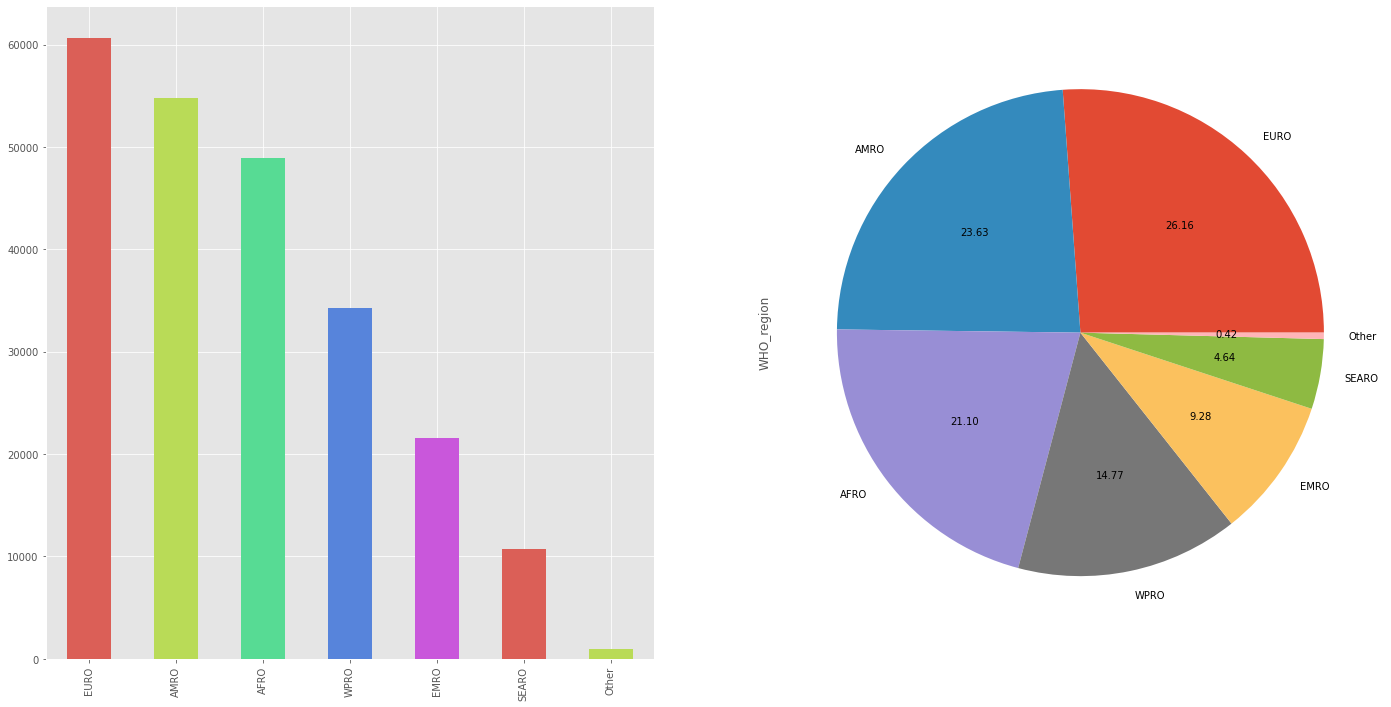

In [15]:
plt.figure(figsize=(24,12))
plt.subplot(1,2,1)
df['WHO_region'].value_counts().plot(kind='bar',color=sns.color_palette("hls", 5))
plt.subplot(1,2,2)
df['WHO_region'].value_counts().plot(kind='pie',autopct="%.2f")
#26.16% values From EURO
#23.63% values From AMRO
#21.60% values From AFRO
#14.77% values From WPRO
#9.28% values From EMRO
#4.65% values From SEARO
#0.42% values From OTHERS

In [16]:
df_copy=df.copy()
#for backup

# **Deaths And Cases By Months**

In [17]:
df['Date_reported']=pd.to_datetime(df['Date_reported']).dt.strftime('%m-%Y')
#convert date into month-year

In [18]:
by_month=df.groupby('Date_reported')['New_cases','Cumulative_cases','New_deaths','Cumulative_deaths'].sum()

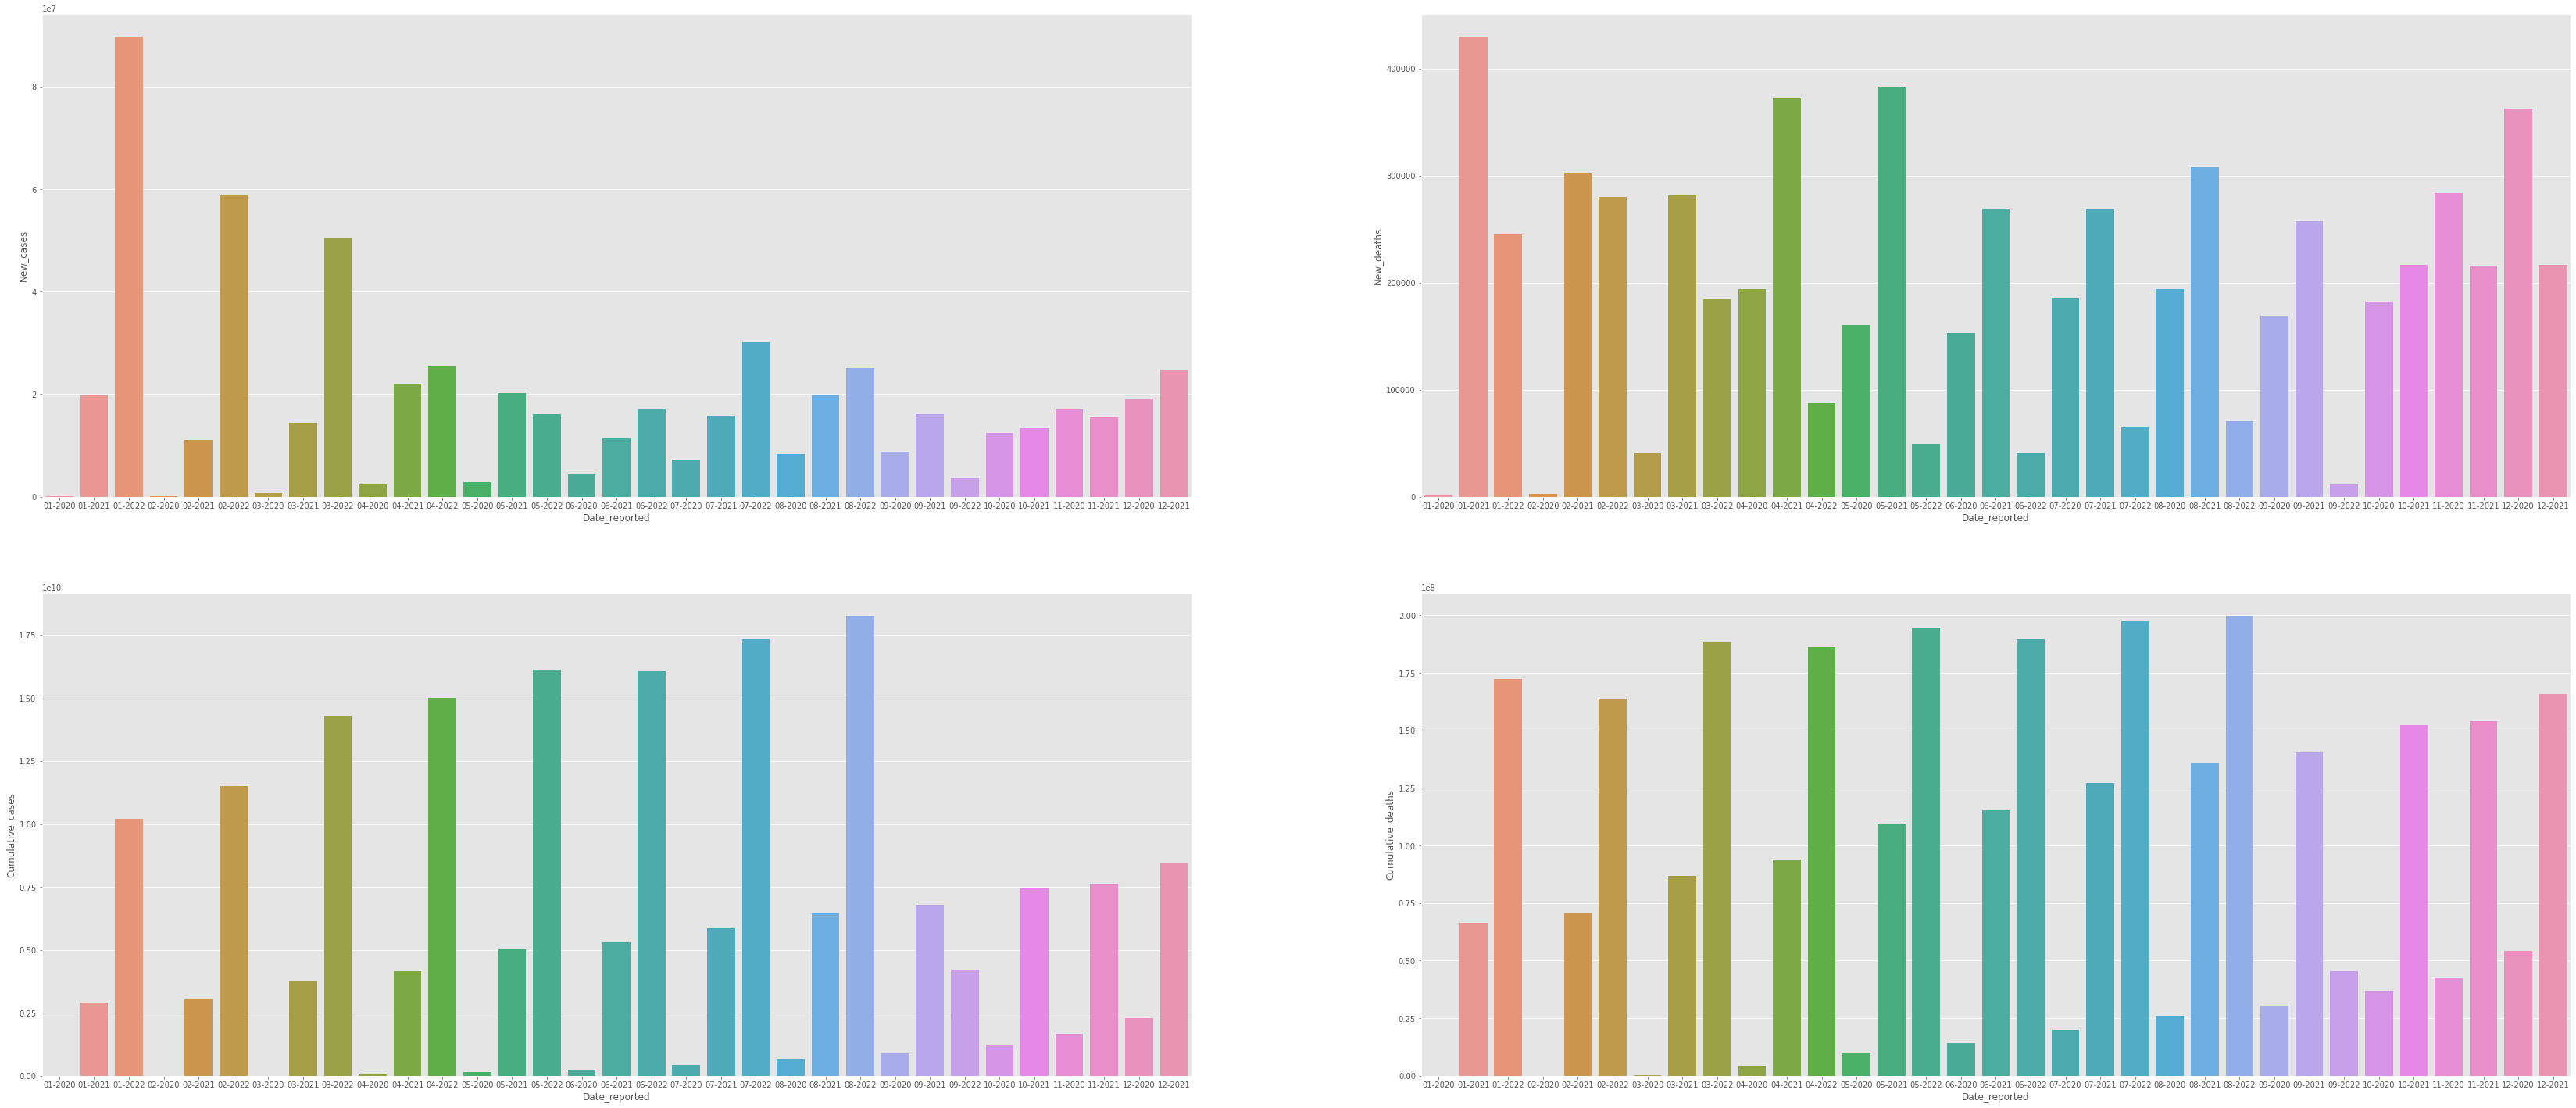

In [19]:
plt.figure(figsize=(58,25))
plt.subplot(2,2,1)
sns.barplot(y=by_month['New_cases'],x=by_month.index)
plt.subplot(2,2,2)
sns.barplot(y=by_month['New_deaths'],x=by_month.index)
plt.subplot(2,2,3)
sns.barplot(y=by_month['Cumulative_cases'],x=by_month.index)
plt.subplot(2,2,4)
sns.barplot(y=by_month['Cumulative_deaths'],x=by_month.index)

# **avg new_cases and avg new death of every country by month and that function  show Deaths And Cases of any country by Month**

In [100]:
def Death_And_Cases(country):
  new_df=df[df['Country']==country]
  by_month=new_df.groupby('Date_reported')['New_cases','Cumulative_cases','New_deaths','Cumulative_deaths'].sum()
  plt.figure(figsize=(40,25))
  plt.subplot(2,2,1)
  plt.title(country)
  sns.barplot(x=by_month['New_cases'],y=by_month.index)
  plt.subplot(2,2,2)
  plt.title(country)
  sns.barplot(x=by_month['Cumulative_cases'],y=by_month.index)
  plt.subplot(2,2,3)
  plt.title(country)
  sns.barplot(x=by_month['New_deaths'],y=by_month.index)
  plt.subplot(2,2,4)
  plt.title(country)
  sns.barplot(x=by_month['Cumulative_deaths'],y=by_month.index)


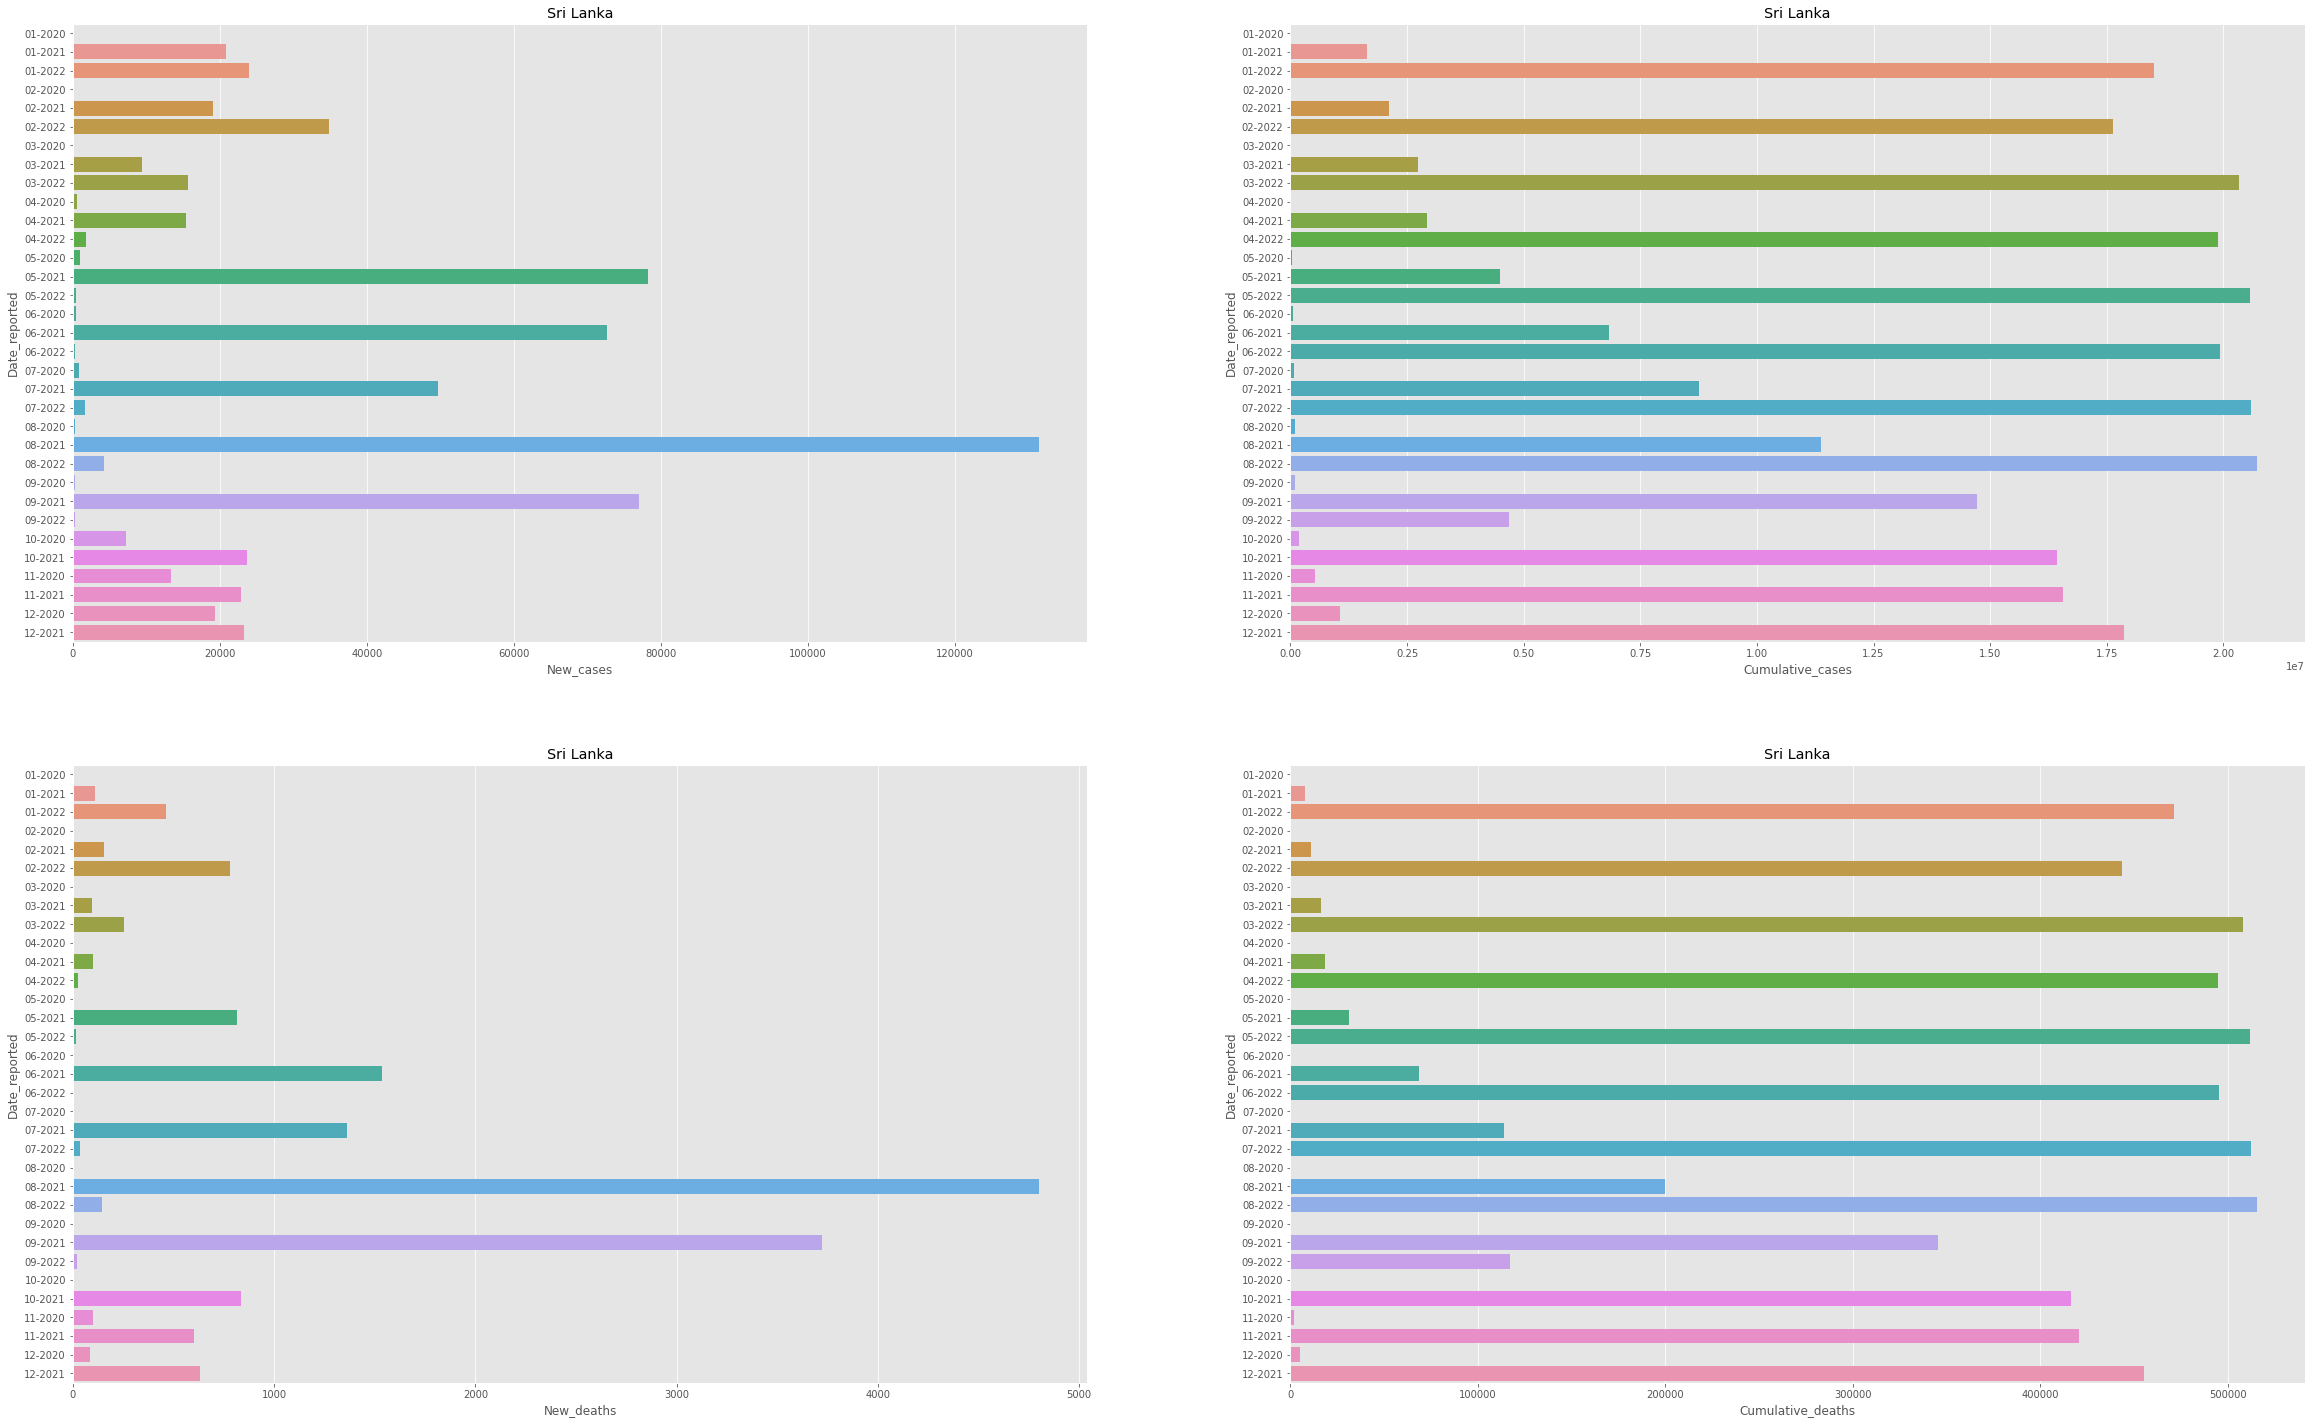

In [101]:
Countries=list(df['Country'].unique())
x=np.random.randint(0,len(Countries))
Death_And_Cases(Countries[x])

# **Total of deaths and cases by region**

In [102]:

by_region=df.groupby('WHO_region')['New_cases','Cumulative_cases','New_deaths','Cumulative_deaths'].sum()
print("Totel Cases By Region :")
by_region.insert(0,"WHO_region",by_region.index)
fig = go.Figure(data=[go.Table(
    header=dict(values=list(by_region.columns),
                fill_color='#e377c2',
                align='left'),
    cells=dict(values=[by_region['WHO_region'],by_region['New_cases'],by_region['Cumulative_cases'],
                       by_region['New_deaths'],by_region['Cumulative_deaths']],
               fill_color='#bcbd22',
               align='left'))
])
fig.show()


Totel Cases By Region :


# **#Total deaths and cases by country**

In [23]:
by_country=df.groupby('Country')['New_cases','Cumulative_cases','New_deaths','Cumulative_deaths'].sum()
print("Totel Cases By Country :")
by_country.insert(0,"Country",by_country.index)
fig = go.Figure(data=[go.Table(
    header=dict(values=list(by_country.columns),
                fill_color='#bcbd22',
                align='left'),
    cells=dict(values=[by_country['Country'],by_country['New_cases'],by_country['Cumulative_cases'],
                       by_country['New_deaths'],by_country['Cumulative_deaths']],
               fill_color='#e377c2',
               align='left'))
])
fig.show()


Totel Cases By Country :


# **Function For Analyze The deaths and cases of any country in 2020 by per month**

In [97]:
def Death_And_Cases_2020(country,df):
  New_cases=[]
  Cumulative_cases=[]
  New_deaths=[]
  Cumulative_deaths=[]
  month_year=[]
  for month in range(1,13):
    date=""
    if month<10:
      month=str(month)
      date="0{}-2020".format(month)
    else:
      month=str(month)
      date="{}-2020".format(month)
    month_year.append(date)
    df_2020=df[df['Date_reported']==date]
    New_cases.append(df_2020[df_2020['Country']==country]['New_cases'].sum())
    Cumulative_cases.append(df_2020[df_2020['Country']==country]['Cumulative_cases'].sum())
    New_deaths.append(df_2020[df_2020['Country']==country]['New_deaths'].sum())
    Cumulative_deaths.append(df_2020[df_2020['Country']==country]['Cumulative_deaths'].sum())
  
  print("Total Deaths And Cases of {} in 2020 of every month :".format(country))
  return pd.DataFrame({"month_year":month_year,"New_cases":New_cases,"Cumulative_cases":Cumulative_cases,
                         "New_deaths":New_deaths,"Cumulative_deaths":Cumulative_deaths})


In [98]:
countries=list(df['Country'].unique())
x=np.random.randint(0,len(countries))

Total Deaths And Cases of Somalia in 2020 of every month :


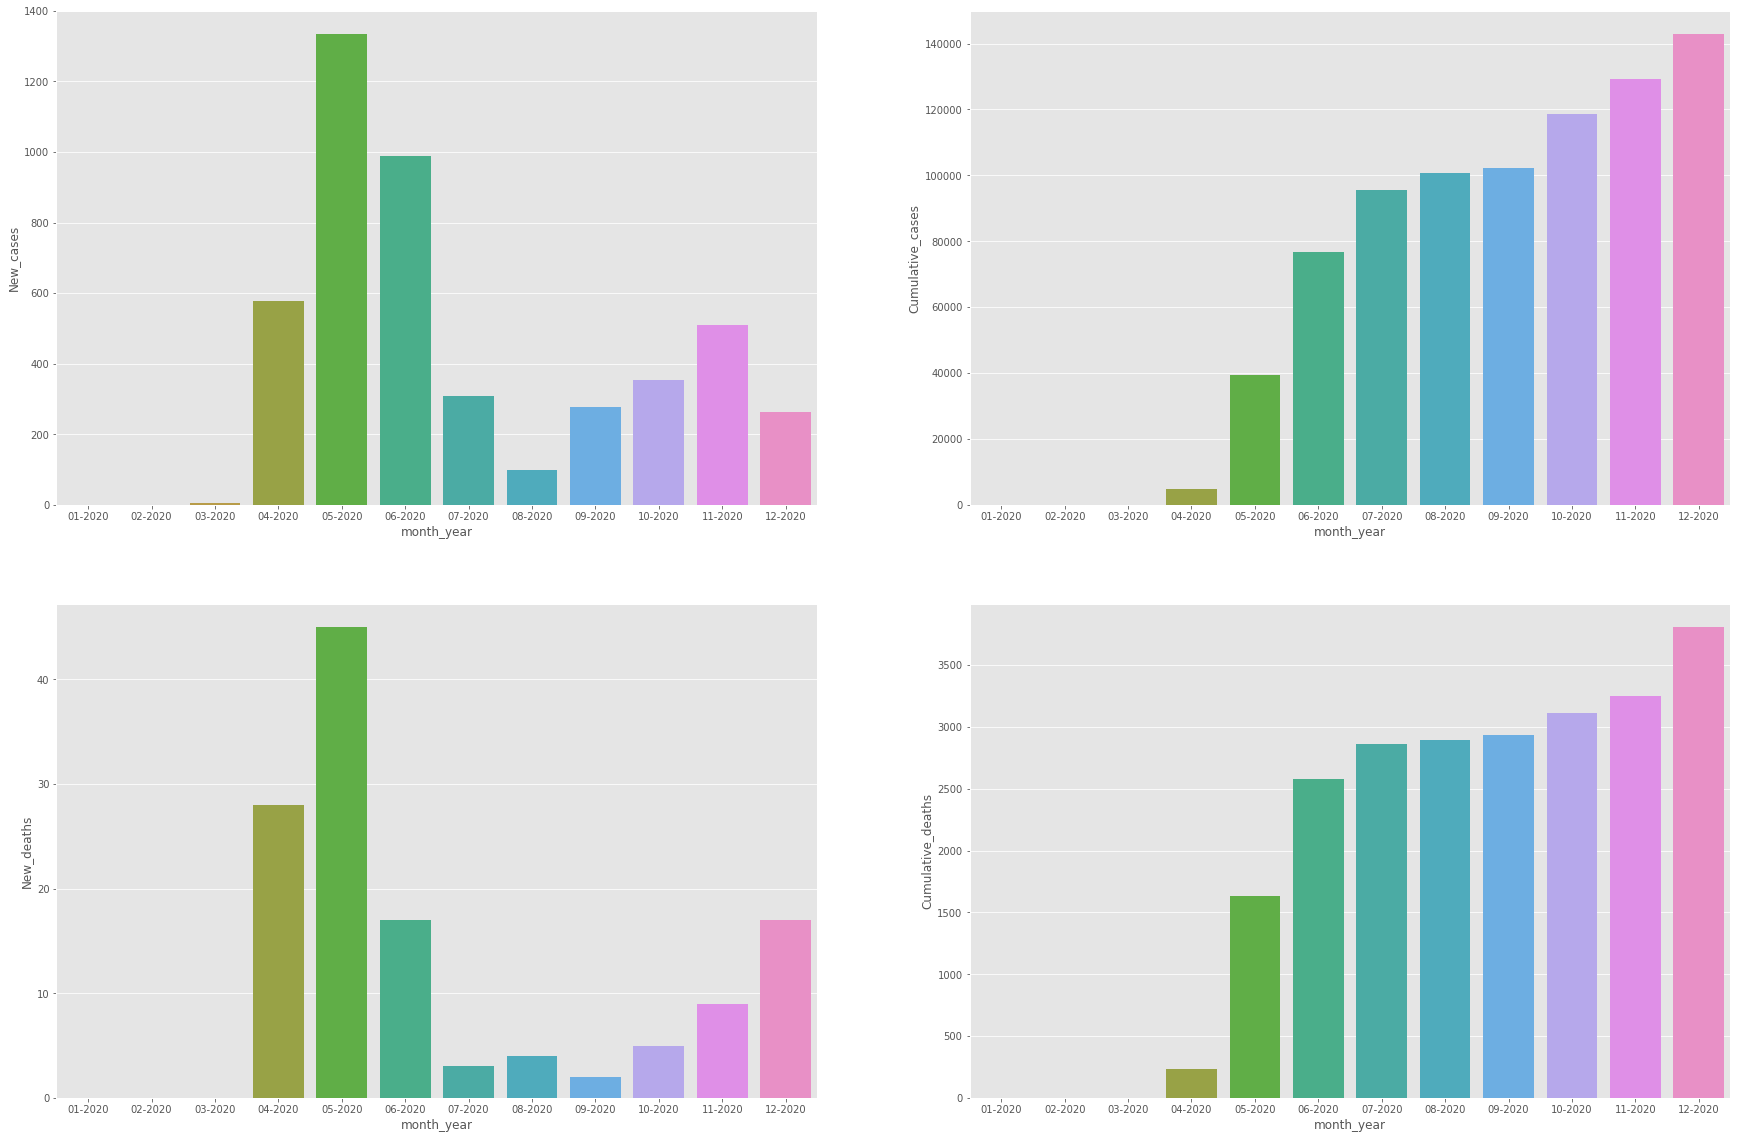

In [99]:
report_of_2020=Death_And_Cases_2020(countries[x],df)
# values=[report_of_2020['month_year'],report_of_2020['New_cases'],report_of_2020['Cumulative_cases'],
#         report_of_2020['New_deaths'],report_of_2020['Cumulative_deaths']]
# fig = go.Figure(data=[go.Table(
#     header=dict(values=list(report_of_2020.columns),
#                 fill_color='#e377c2',
#                 align='left'),
#     cells=dict(values=values,
#                fill_color='paleturquoise',
#                align='left'))
# ])
# fig.show()
plt.figure(figsize=(30,20))
plt.subplot(2,2,1)
sns.barplot(report_of_2020['month_year'],y=report_of_2020['New_cases'])
plt.subplot(2,2,2)
sns.barplot(report_of_2020['month_year'],y=report_of_2020['Cumulative_cases'])
plt.subplot(2,2,3)
sns.barplot(report_of_2020['month_year'],y=report_of_2020['New_deaths'])
plt.subplot(2,2,4)
sns.barplot(report_of_2020['month_year'],y=report_of_2020['Cumulative_deaths'])

#**Function For Analyze The deaths and cases of any country in 2021 by per month**

In [89]:
def Death_And_Cases_2021(country,df):
  New_cases=[]
  Cumulative_cases=[]
  New_deaths=[]
  Cumulative_deaths=[]
  month_year=[]
  for month in range(1,13):
    date=""
    if month<10:
      month=str(month)
      date="0{}-2021".format(month)
    else:
      month=str(month)
      date="{}-2021".format(month)
    month_year.append(date)
    df_2021=df[df['Date_reported']==date]
    New_cases.append(df_2021[df_2021['Country']==country]['New_cases'].sum())
    Cumulative_cases.append(df_2021[df_2021['Country']==country]['Cumulative_cases'].sum())
    New_deaths.append(df_2021[df_2021['Country']==country]['New_deaths'].sum())
    Cumulative_deaths.append(df_2021[df_2021['Country']==country]['Cumulative_deaths'].sum())
  
  print("Total Deaths And Cases of {} in 2021 of every month :".format(country))
  return pd.DataFrame({"month_year":month_year,"New_cases":New_cases,"Cumulative_cases":Cumulative_cases,
                         "New_deaths":New_deaths,"Cumulative_deaths":Cumulative_deaths})


Total Deaths And Cases of Saint Vincent and the Grenadines in 2021 of every month :


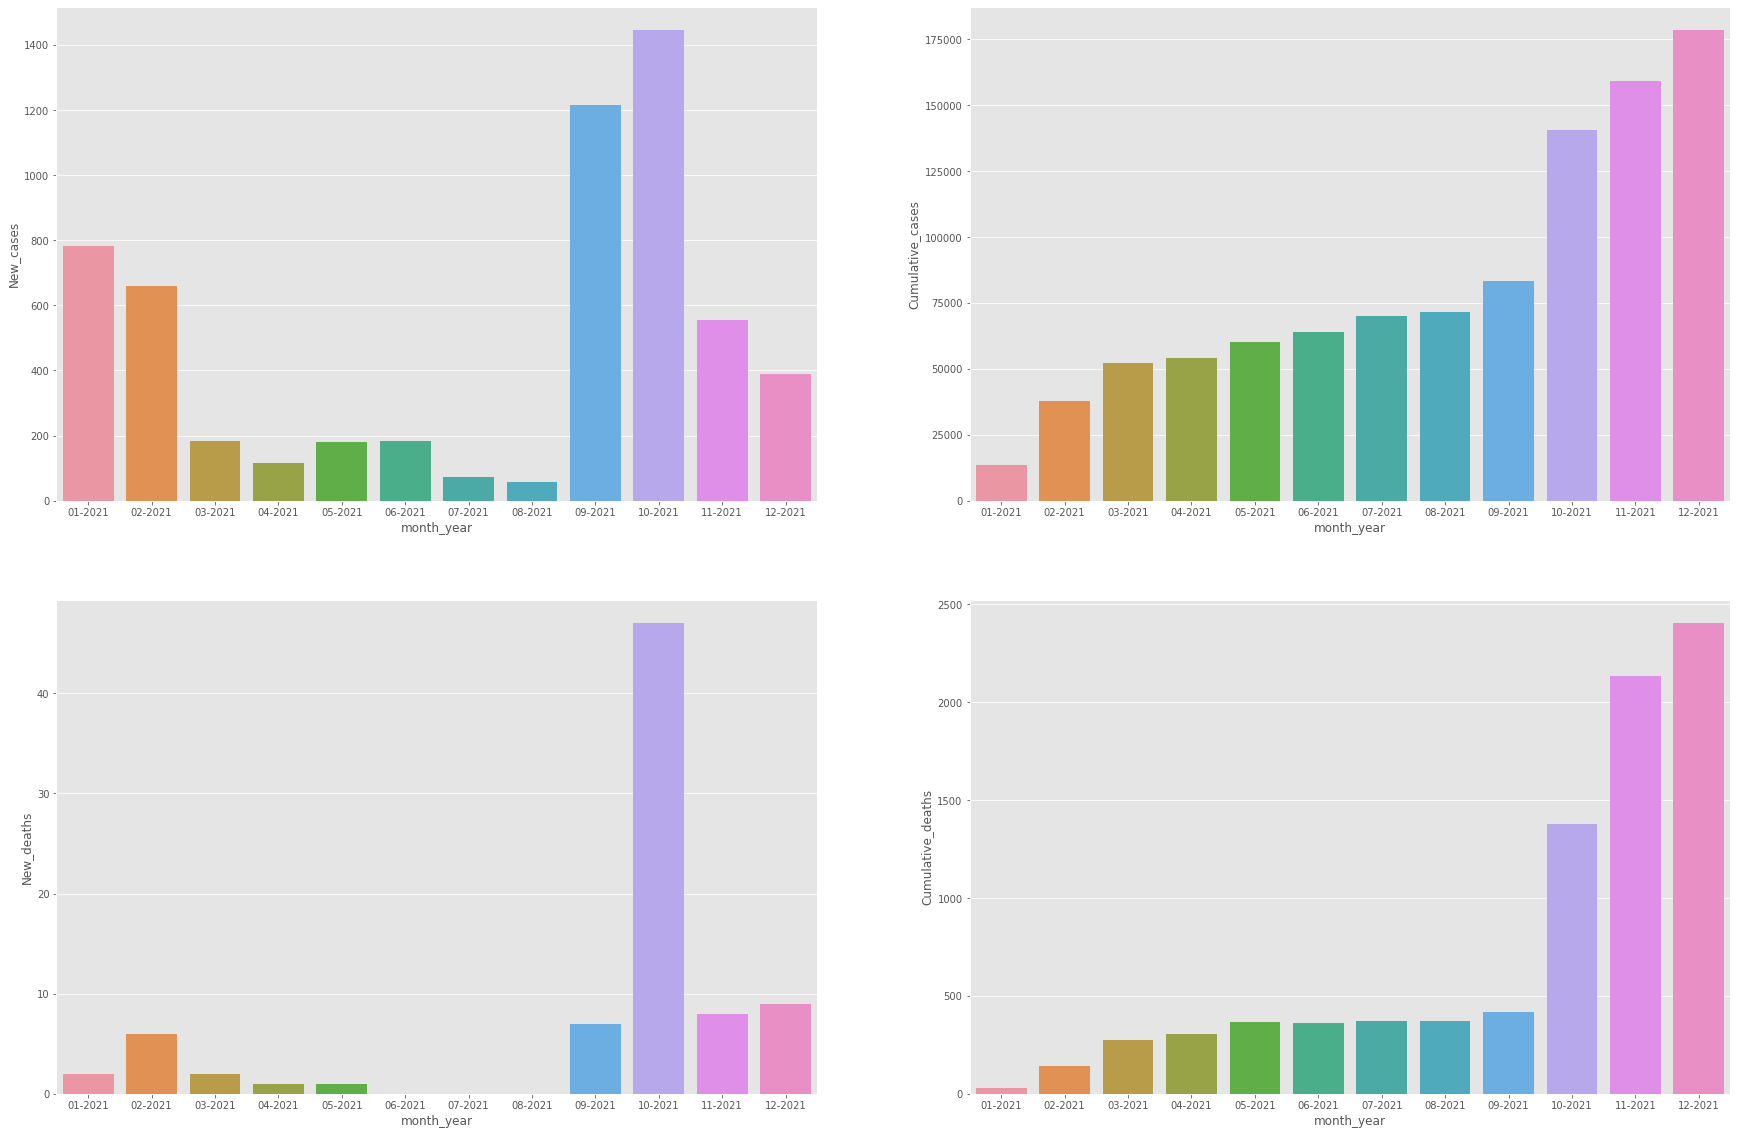

In [90]:
report_of_2021=Death_And_Cases_2021(countries[x],df)
plt.figure(figsize=(30,20))
plt.subplot(2,2,1)
sns.barplot(report_of_2021['month_year'],y=report_of_2021['New_cases'])
plt.subplot(2,2,2)
sns.barplot(report_of_2021['month_year'],y=report_of_2021['Cumulative_cases'])
plt.subplot(2,2,3)
sns.barplot(report_of_2021['month_year'],y=report_of_2021['New_deaths'])
plt.subplot(2,2,4)
sns.barplot(report_of_2021['month_year'],y=report_of_2021['Cumulative_deaths'])

# **Function For Analyze The deaths and cases of any country in 2022 by per month**

In [73]:
def Death_And_Cases_2022(country,df):
  New_cases=[]
  Cumulative_cases=[]
  New_deaths=[]
  Cumulative_deaths=[]
  month_year=[]
  for month in range(1,13):
    date=""
    if month<10:
      month=str(month)
      date="0{}-2022".format(month)
    else:
      month=str(month)
      date="{}-2022".format(month)
    month_year.append(date)
    df_2022=df[df['Date_reported']==date]
    New_cases.append(df_2022[df_2022['Country']==country]['New_cases'].sum())
    Cumulative_cases.append(df_2022[df_2022['Country']==country]['Cumulative_cases'].sum())
    New_deaths.append(df_2022[df_2022['Country']==country]['New_deaths'].sum())
    Cumulative_deaths.append(df_2022[df_2022['Country']==country]['Cumulative_deaths'].sum())
  
  print("Total Deaths And Cases of {} in 2021 of every month :".format(country))
  return pd.DataFrame({"month_year":month_year,"New_cases":New_cases,"Cumulative_cases":Cumulative_cases,
                         "New_deaths":New_deaths,"Cumulative_deaths":Cumulative_deaths})

Total Deaths And Cases of Sri Lanka in 2021 of every month :


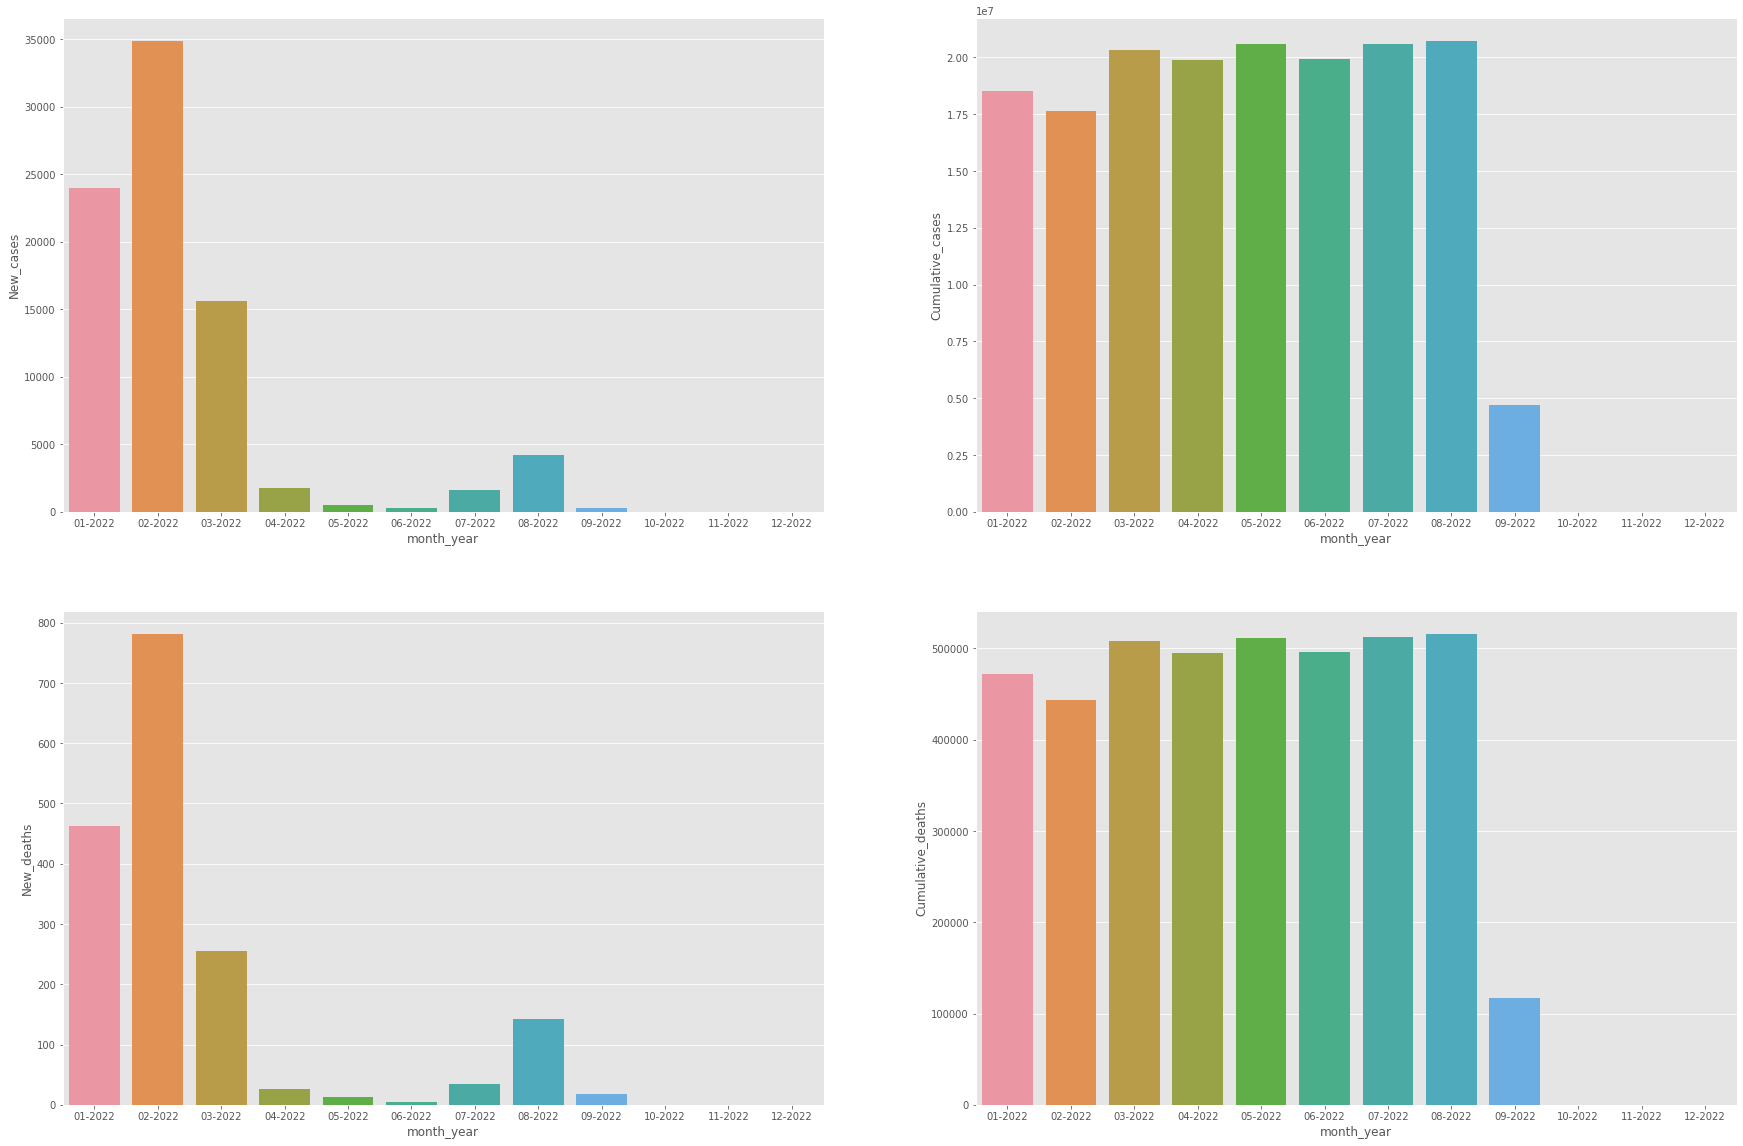

In [103]:
report_of_2022=Death_And_Cases_2022(countries[x],df)

# fig.show()
plt.figure(figsize=(30,20))
plt.subplot(2,2,1)
sns.barplot(report_of_2022['month_year'],y=report_of_2022['New_cases'])
plt.subplot(2,2,2)
sns.barplot(report_of_2022['month_year'],y=report_of_2022['Cumulative_cases'])
plt.subplot(2,2,3)
sns.barplot(report_of_2022['month_year'],y=report_of_2022['New_deaths'])
plt.subplot(2,2,4)
sns.barplot(report_of_2022['month_year'],y=report_of_2022['Cumulative_deaths'])

# **Analysis of New Cases Of Every year and any country by month**

Saint Vincent and the Grenadines


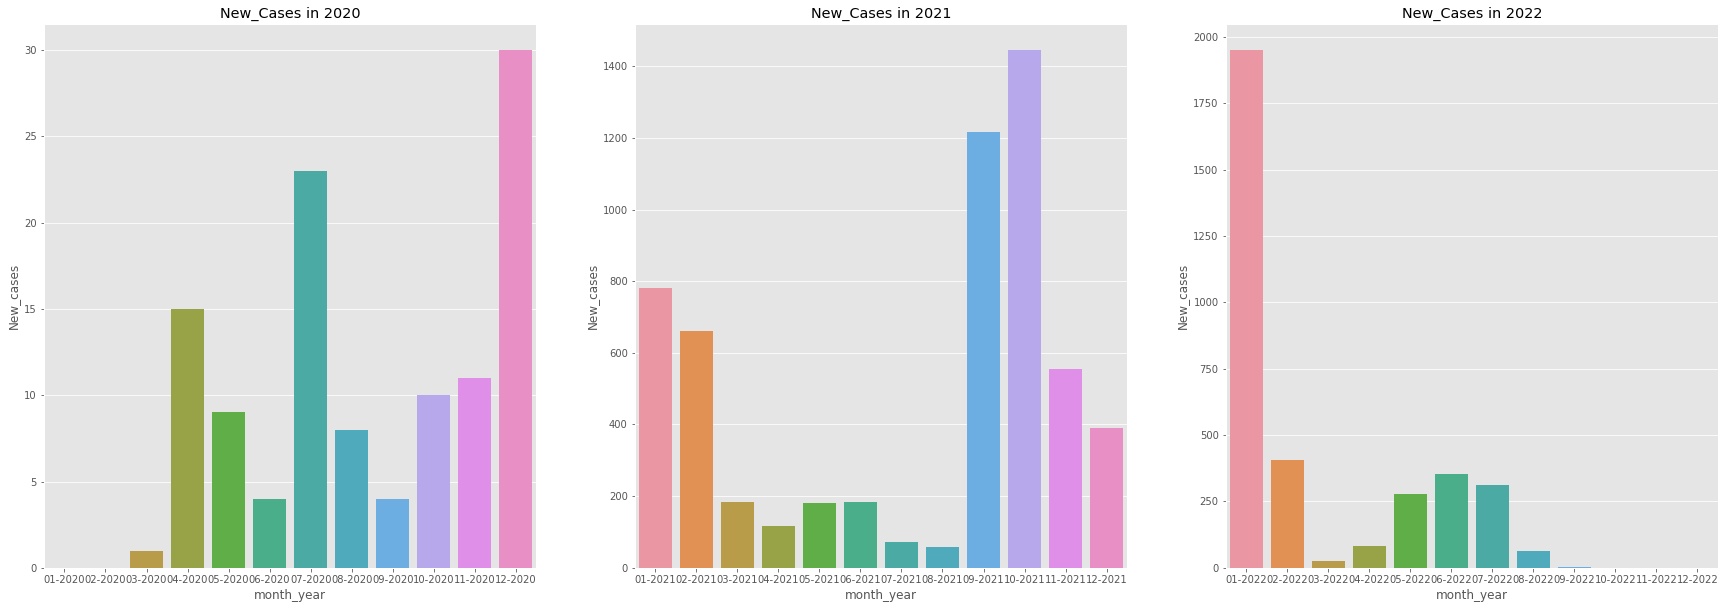

In [93]:
print(countries[x])
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
sns.barplot(report_of_2020['month_year'],y=report_of_2020['New_cases'])
plt.title("New_Cases in 2020")
plt.subplot(1,3,2)
sns.barplot(report_of_2021['month_year'],y=report_of_2021['New_cases'])
plt.title("New_Cases in 2021")
plt.subplot(1,3,3)
sns.barplot(report_of_2022['month_year'],y=report_of_2022['New_cases'])
plt.title("New_Cases in 2022")
plt.show()

#**Analysis of New Deaths Of Every year and country by month**

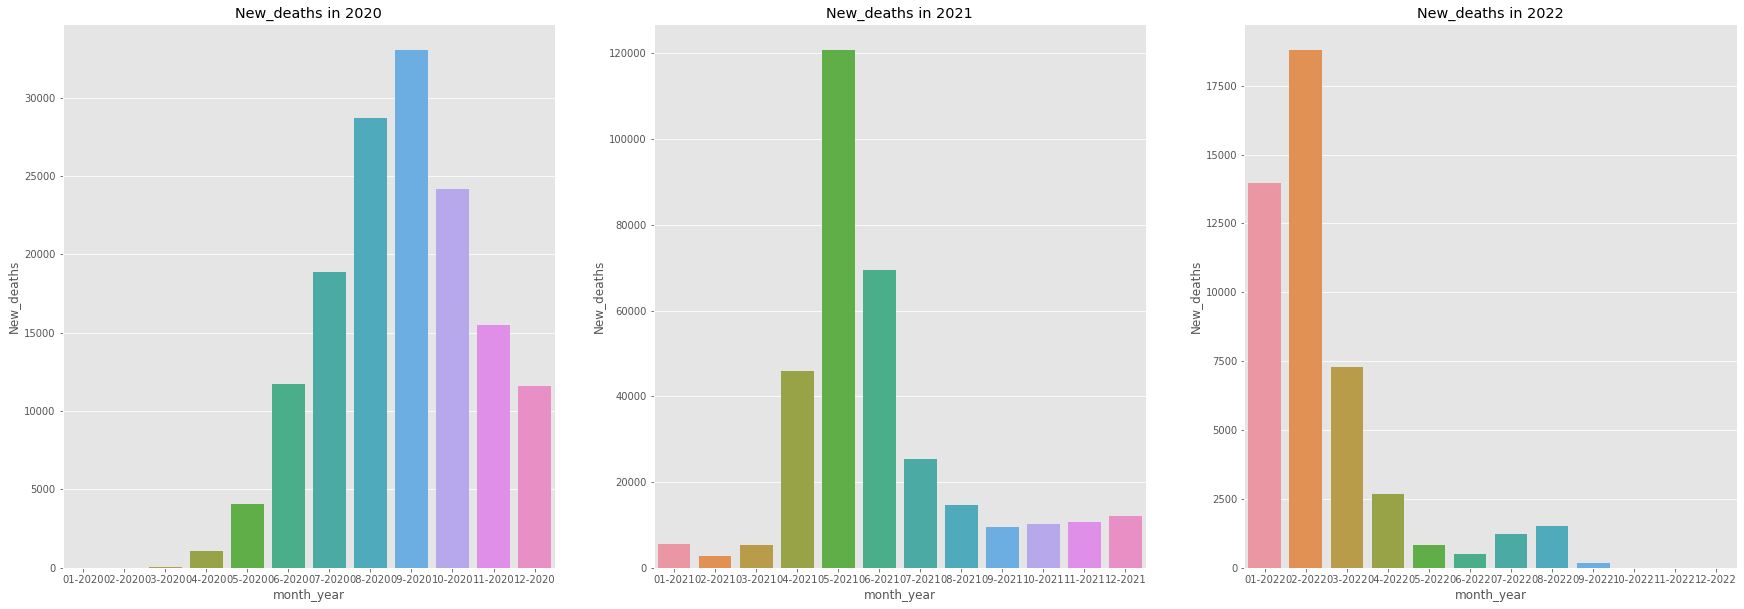

In [81]:
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
sns.barplot(report_of_2020['month_year'],y=report_of_2020['New_deaths'])
plt.title("New_deaths in 2020")
plt.subplot(1,3,2)
sns.barplot(report_of_2021['month_year'],y=report_of_2021['New_deaths'])
plt.title("New_deaths in 2021")
plt.subplot(1,3,3)
sns.barplot(report_of_2022['month_year'],y=report_of_2022['New_deaths'])
plt.title("New_deaths in 2022")
plt.show()

#**Analysis of Cumulative_deaths Of Every year and country by month**

Sri Lanka


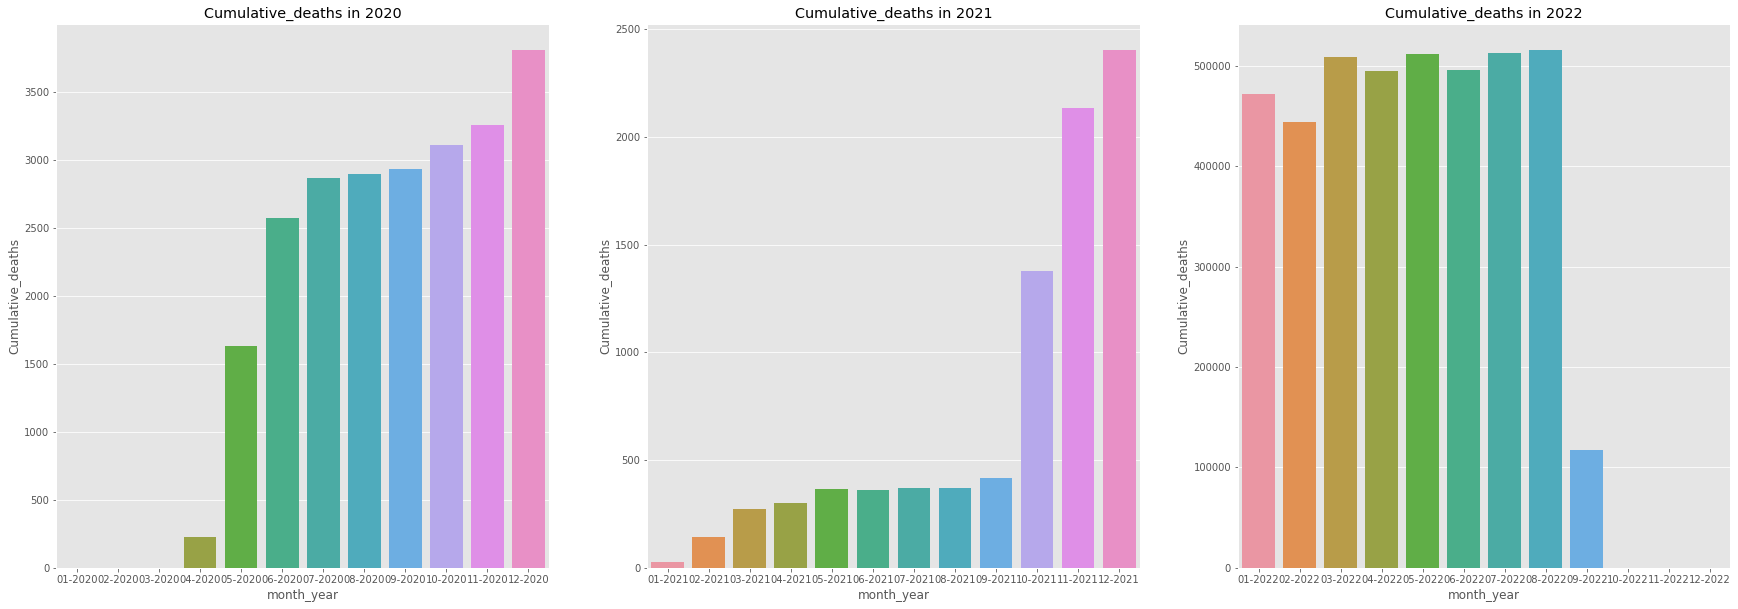

In [104]:
print(countries[x])
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
sns.barplot(report_of_2020['month_year'],y=report_of_2020['Cumulative_deaths'])
plt.title("Cumulative_deaths in 2020")
plt.subplot(1,3,2)
sns.barplot(report_of_2021['month_year'],y=report_of_2021['Cumulative_deaths'])
plt.title("Cumulative_deaths in 2021")
plt.subplot(1,3,3)
sns.barplot(report_of_2022['month_year'],y=report_of_2022['Cumulative_deaths'])
plt.title("Cumulative_deaths in 2022")
plt.show()

# **Analysis of Cumulative_Cases Of Every year and country by month**

Saint Vincent and the Grenadines


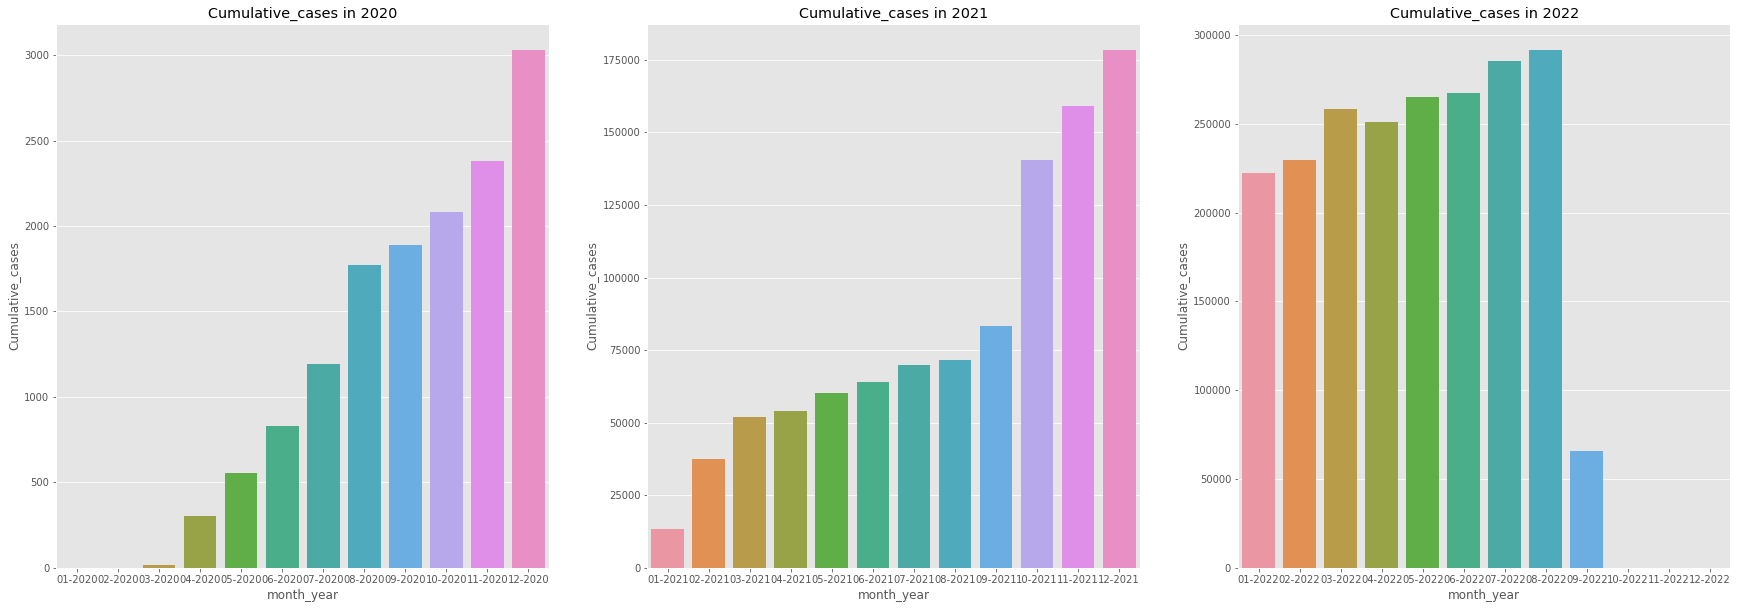

In [95]:
print(countries[x])
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
sns.barplot(report_of_2020['month_year'],y=report_of_2020['Cumulative_cases'])
plt.title("Cumulative_cases in 2020")
plt.subplot(1,3,2)
sns.barplot(report_of_2021['month_year'],y=report_of_2021['Cumulative_cases'])
plt.title("Cumulative_cases in 2021")
plt.subplot(1,3,3)
sns.barplot(report_of_2022['month_year'],y=report_of_2022['Cumulative_cases'])
plt.title("Cumulative_cases in 2022")
plt.show()

# **sunburst plot**

In [96]:
def Region_And_Country(val):
  fig = px.sunburst(df, path=['WHO_region','Country'], values=val.format(val),title=val)
  fig.show()
values=['New_cases','Cumulative_cases','New_deaths','Cumulative_deaths']
for val in values:
  Region_And_Country(val)


#**Thanks You and give me feedback and suggestion::**